## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

## 1. Loading Data

In [2]:
df = pd.read_csv("turboaz.csv")

In [3]:
df.head()

,Sheher,Marka,Model,Buraxilish ili,Ban novu,Reng,Muherrikin hecmi,Muherrikin gucu,Yanacaq novu,Yurush,Suretler qutusu,Oturucu,Yeni,Qiymet,Extra Info,Seller comment
0,Sumqayıt,Mercedes,C 200,1999,Sedan,Qara,2.0 L,175 a.g.,Benzin,366 000 km,Avtomat,Arxa,Xeyr,12500 AZN,Kreditdədir,Barter mümkündür
1,Bakı,Mercedes,C 180,2014,Sedan,Qara,1.6 L,167 a.g.,Benzin,102 000 km,Avtomat,Arxa,Xeyr,31500 $,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."
2,Sumqayıt,Mercedes,C 240,2002,Sedan,Qara,2.6 L,177 a.g.,Benzin,469 700 km,Avtomat,Arxa,Xeyr,11700 AZN,Kreditdədir,Barter mümkündür
3,Şirvan,Mercedes,C 180,1998,Sedan,Göy,1.8 L,125 a.g.,Benzin,556 680 km,Avtomat,Arxa,Xeyr,9700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Mawin BAKIDADI. Tecili satilir yaxwi veziyetde...
4,Sumqayıt,Mercedes,C 220,2000,Sedan,Gümüşü,2.2 L,150 a.g.,Dizel,300 000 km,Avtomat,Arxa,Xeyr,12700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Vurugu udari deyisen detali curuyu qetiyyen yo...


In [4]:
df.shape

(1328, 16)

In [5]:
df.isnull().sum()

Sheher              0
Marka               0
Model               0
Buraxilish ili      0
Ban novu            0
Reng                0
Muherrikin hecmi    0
Muherrikin gucu     0
Yanacaq novu        0
Yurush              0
Suretler qutusu     0
Oturucu             0
Yeni                0
Qiymet              0
Extra Info          6
Seller comment      1
dtype: int64

In [6]:
df_3 = df[['Yurush', 'Buraxilish ili', 'Qiymet']].copy()

In [7]:
def str_to_num(df, col, remove=[]):
    """
    Convert a column of dataframe into numeric type by removing substrings.

    Parameters:
    - df: Pandas dataframe.
    - col: name of string column.
    - remove: an array containing substrings to remove.

    Returns:
    - numeric column.
    """
    
    for sstr in remove:
        df.loc[:, col] = df.loc[:, col].str.replace(sstr, '')
    
    return pd.to_numeric(df.loc[:, col])

In [8]:
df_3['Yurush'] = str_to_num(df_3, 'Yurush', ['km', ' '])

In [9]:
df_3.isnull().sum()

Yurush            0
Buraxilish ili    0
Qiymet            0
dtype: int64

From the above result, we can conclude there is no value that has other substring than space and "km" in X1.

In [10]:
# currency conversion
rate = 1.70
contains_USD = df_3['Qiymet'].str.contains('\$') # dollar as a regex means end of string so escape it
df_3['Qiymet'] = str_to_num(df_3, 'Qiymet', ['$', 'AZN',' ']).astype('float64')

In [11]:
df_3.loc[contains_USD, 'Qiymet'] = df_3[contains_USD]['Qiymet'] * rate

In [12]:
df_3.isnull().sum()

Yurush            0
Buraxilish ili    0
Qiymet            0
dtype: int64

In [13]:
df_3.head()

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500.0
1,102000,2014,53550.0
2,469700,2002,11700.0
3,556680,1998,9700.0
4,300000,2000,12700.0


## 2. Visualization

In [14]:
X1 = df_3['Yurush']
X2 = df_3['Buraxilish ili']
Y = df_3['Qiymet']

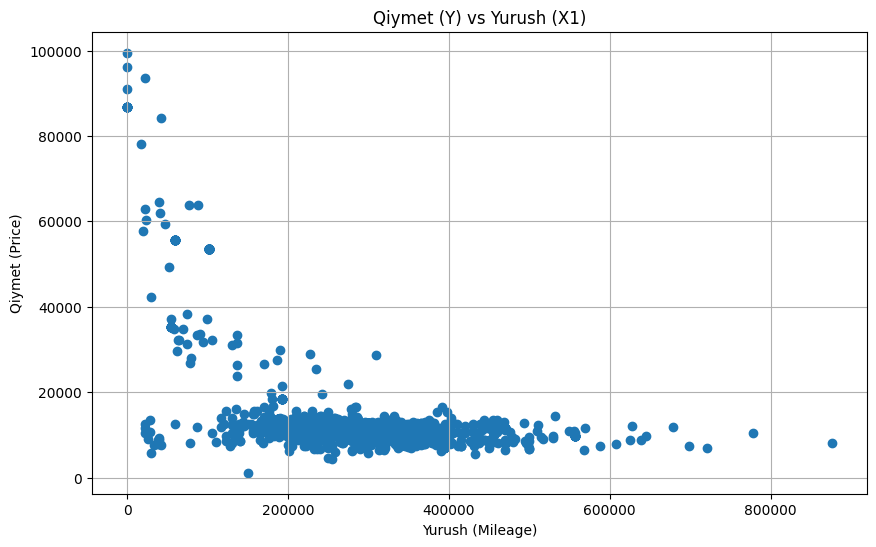

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X1, Y)

plt.title('Qiymet (Y) vs Yurush (X1)')
plt.xlabel('Yurush (Mileage)')
plt.ylabel('Qiymet (Price)')

plt.grid(True)
plt.show()

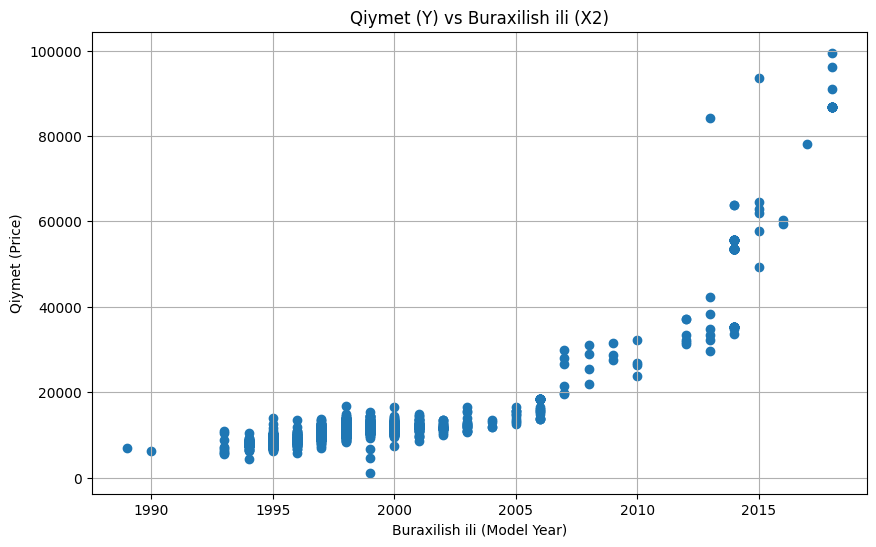

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X2, Y)

plt.title('Qiymet (Y) vs Buraxilish ili (X2)')
plt.xlabel('Buraxilish ili (Model Year)')
plt.ylabel('Qiymet (Price)')

plt.grid(True)
plt.show()

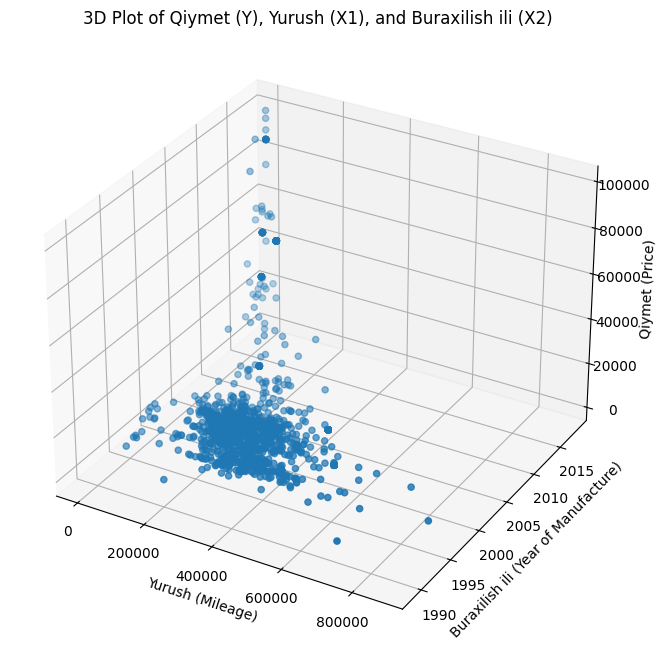

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Y)

ax.set_title('3D Plot of Qiymet (Y), Yurush (X1), and Buraxilish ili (X2)')
ax.set_xlabel('Yurush (Mileage)')
ax.set_ylabel('Buraxilish ili (Year of Manufacture)')
ax.set_zlabel('Qiymet (Price)')

plt.show()

## 3. Implementation of Linear Regression from Scratch

In [18]:
def hypothesis(theta, X):
    """
    Compute the predictions for linear regression.

    Parameters:
    - theta: parameters.
    - X: input features.

    Returns:
    - predictions: all the predictions for respective Xs.
    """
    
    return X.dot(theta)

In [19]:
def calculate_cost(hypothesis_val, y_true):
    """
    Compute the cost function for linear regression.

    Parameters:
    - hypothesis_val: the predicted values.
    - y_true: numpy array of shape (n,), true values.

    Returns:
    - cost: scalar value representing the cost.
    """
    
    n = len(y_true)
    cost = (1 / (2 * n)) * np.sum((hypothesis_val - y_true) ** 2)
    
    return cost

In [20]:
def normalize_data(x):
    """
    Normalize data using Z-score normalization.

    Parameters:
    - df: numpy array with shape (n,).

    Returns:
    - normalized_data: numpy array.
    """
    
    mean = np.mean(x)
    std = np.std(x)
    normalized_data = (x - mean) / std
    
    return normalized_data

In [21]:
def gradient_descent(X, y, thetas, alpha, num_iters):
    """
    Perform gradient descent to learn theta.
    
    Parameters:
    - y_true: numpy array of shape (n,), true values.
    - X: numpy array of shape (n, d), where n is the number of examples and d is the number of features.
    - thetas: numpy array of shape (d,), coefficients with initial values.
    - alpha: learning rate.
    - num_iters: number of iterations.

    Returns:
    - thetas: thetas minimizing cost.
    - J_history: the changing values of cost functions over iterations.
    """
    
    n = len(y)
    J_history = []

    for i in range(num_iters):
        difference = hypothesis(thetas, X) - y
        
        # calculate the gradient
        gradient = (1 / n) * np.dot(X.T, difference)

        # update the parameters
        thetas = thetas - alpha * gradient

        # save the cost J
        cost = calculate_cost(hypothesis(thetas, X), y)
        J_history.append(cost)
        
        if (((i + 1) % 1000) == 0):
            print(f"{i + 1}th iteration | cost function:{round(cost, 3)}")
        
        # check for closeness of values
        if i > 0 and np.linalg.norm(alpha * gradient) < 1e-10:
            print(f"Convergence reached at iteration {i}")
            break

    return thetas, J_history

In [22]:
X0 = np.ones(df_3.shape[0])
X1_normalized = normalize_data(X1.to_numpy())
X2_normalized = normalize_data(X2.to_numpy())
Y_normalized = normalize_data(Y.to_numpy())

# feature matrix
X_normalized = np.array([X0, X1_normalized, X2_normalized]).T

# initialize thetas
d = X_normalized.shape[1] # features
theta0 = np.zeros(d) # approach 1
thetar = np.random.rand(d) # approach 2

# Set learning rate and number of iterations
alpha = 0.001
num_iters = 10000

In [23]:
theta0, J_history0 = gradient_descent(X_normalized, Y_normalized, theta0, alpha, num_iters)

1000th iteration | cost function:0.145
2000th iteration | cost function:0.117
3000th iteration | cost function:0.111
4000th iteration | cost function:0.108
5000th iteration | cost function:0.107
6000th iteration | cost function:0.107
7000th iteration | cost function:0.106
8000th iteration | cost function:0.106
9000th iteration | cost function:0.106
10000th iteration | cost function:0.106


In [24]:
print("Optimized parameters for approach 1 (theta):")
print(theta0)

Optimized parameters for approach 1 (theta):
[ 1.67703586e-14 -9.83705199e-02  8.25840555e-01]


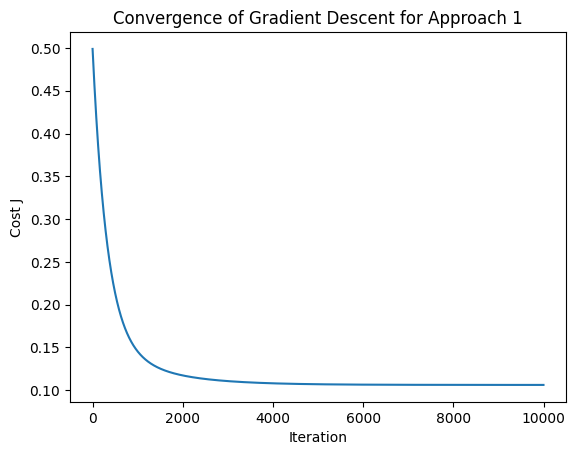

In [25]:
# Plot the cost function
plt.plot(J_history0)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent for Approach 1')
plt.show()

In [26]:
thetar, J_historyr = gradient_descent(X_normalized, Y_normalized, thetar, alpha, num_iters)

1000th iteration | cost function:0.173
2000th iteration | cost function:0.115
3000th iteration | cost function:0.107
4000th iteration | cost function:0.106
5000th iteration | cost function:0.106
6000th iteration | cost function:0.106
7000th iteration | cost function:0.106
8000th iteration | cost function:0.106
9000th iteration | cost function:0.106
10000th iteration | cost function:0.106


In [27]:
print("Optimized parameters for approach 2 (theta):")
print(thetar)

Optimized parameters for approach 2 (theta):
[ 4.29492362e-05 -9.29260828e-02  8.31285047e-01]


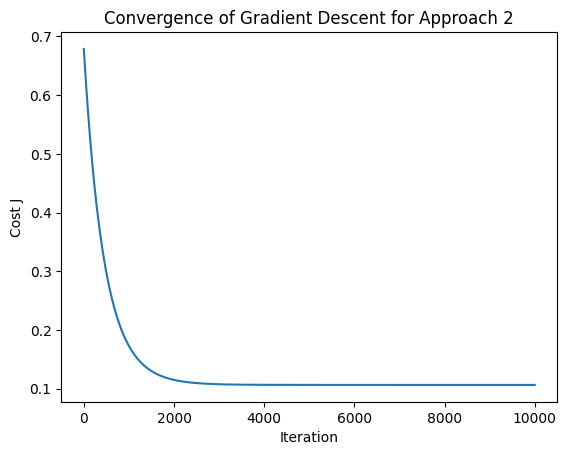

In [28]:
# Plot the cost function
plt.plot(J_historyr)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent for Approach 2')
plt.show()

Final value of cost is the same in both cases, so we can choose any approach.

_In the assigment, at first, we accepted X1 as "Yurush", so I will go with that order despite X1 is accepted as "Buraxilish ili" later._

In [29]:
# Predicted values for Buraxilish ili
Y_pred = theta0[0] + theta0[2] * X2_normalized

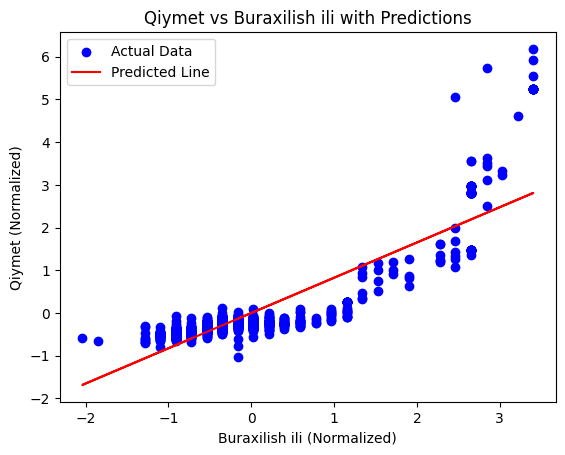

In [30]:
# Plot actual points
plt.scatter(X2_normalized, Y_normalized, color='blue', label='Actual Data')

# Plot line of predictions
plt.plot(X2_normalized, Y_pred, color='red', label='Predicted Line')

# Add labels and title
plt.xlabel('Buraxilish ili (Normalized)')
plt.ylabel('Qiymet (Normalized)')
plt.title('Qiymet vs Buraxilish ili with Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

In [31]:
# Predicted values for Yurush
Y_pred = theta0[0] + theta0[1] * X1_normalized

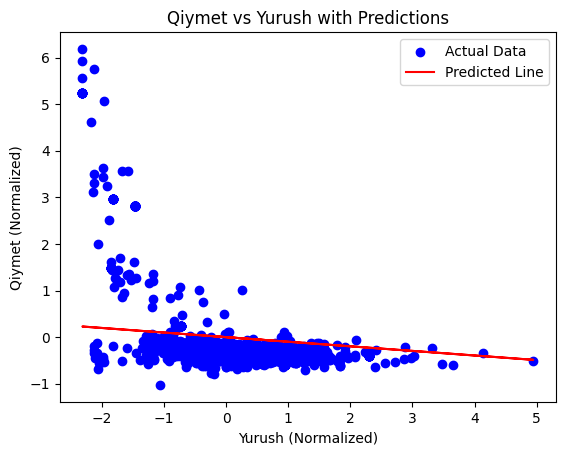

In [32]:
# Plot actual points
plt.scatter(X1_normalized, Y_normalized, color='blue', label='Actual Data')

# Plot line of predictions
plt.plot(X1_normalized, Y_pred, color='red', label='Predicted Line')

# Add labels and title
plt.xlabel('Yurush (Normalized)')
plt.ylabel('Qiymet (Normalized)')
plt.title('Qiymet vs Yurush with Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

In [33]:
# Predicted values for all
Y_pred = theta0[0] + theta0[1] * X1_normalized + theta0[2] * X2_normalized

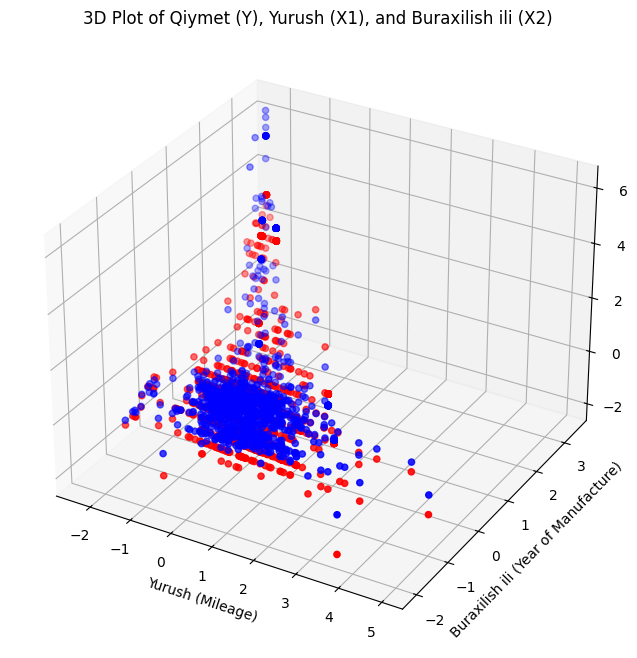

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1_normalized, X2_normalized, Y_normalized, color='blue')
ax.scatter(X1_normalized, X2_normalized, Y_pred, color='red')

ax.set_title('3D Plot of Qiymet (Y), Yurush (X1), and Buraxilish ili (X2)')
ax.set_xlabel('Yurush (Mileage)')
ax.set_ylabel('Buraxilish ili (Year of Manufacture)')
ax.set_zlabel('Qiymet (Price)')

plt.show()

Given are two new cars which are not in the dataset:

- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

In [35]:
def linear_prediction(X):
    X11, X22 = X
    
    X11 = (X11 - X1.mean())/X1.std()
    X22 = (X22 - X2.mean())/X2.std()
    
    result = theta0[0] + theta0[1] * X11 + theta0[2] * X22
    
    return result * Y.std() + Y.mean()

In [36]:
# Car 1 (Expected: 11500)
X_car_1 = [240000, 2000]
result_car_1 = linear_prediction(X_car_1)
print(f"Prediction: ~{round(result_car_1)}; Actual: 11500; Difference: ~{round(result_car_1 - 11500)}.")

Prediction: ~15841; Actual: 11500; Difference: ~4341.


In [37]:
# Car 2 (Expected: 8800)
X_car_2 = [415558, 1996]
result_car_2 = linear_prediction(X_car_2)
print(f"Prediction: ~{round(result_car_2)}; Actual: 8800; Difference: ~{round(result_car_2 - 8800)}.")

Prediction: ~5426; Actual: 8800; Difference: ~-3374.


## 4. Linear Regression Using Library

Prediction with normalized data:

In [38]:
def library_prediction(X, model):
    """
    Normalize given data and predict with Linear Regression model.

    Parameters:
    - X: inputs.
    - model: fitted model.

    Returns:
    - predictions denormalized.
    """
    
    X11, X22 = X
    
    X11 = (X11 - X1.mean())/X1.std()
    X22 = (X22 - X2.mean())/X2.std()
    
    result = model.predict(np.array([[X11, X22]]))
    
    return result * Y.std() + Y.mean()

In [39]:
model = LinearRegression()
model.fit(X_normalized[:, 1:], Y_normalized)

LinearRegression()

In [44]:
result_car_1 = round(library_prediction(X_car_1, model)[0])
print(f"Prediction: ~{result_car_1}; Actual: 11500; Difference: ~{round(result_car_1 - 11500)}.")

Prediction: ~15821; Actual: 11500; Difference: ~4321.


In [45]:
result_car_2 = round(library_prediction(X_car_2, model)[0])
print(f"Prediction: ~{round(result_car_2)}; Actual: 8800; Difference: ~{round(result_car_2 - 8800)}.")

Prediction: ~5454; Actual: 8800; Difference: ~-3346.


## 5. Linear Regression Using Normal Equation

In [46]:
def normal_equation(X, y): 
    """
    Implement normal equation to solve regression problem.

    Parameters:
    - X: numpy array of shape (n, d), feature matrix (with bias term).
    - y: numpy array of shape (n,), target values.
    
    Returns:
    - theta: numpy array of shape (d,), coefficients that minimize cost.
    """
    
    X_transpose = X.T
    theta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    
    return theta

In [47]:
theta_normal = normal_equation(X_normalized, Y_normalized)
theta_normal

array([ 1.69725345e-14, -9.33437483e-02,  8.30867464e-01])

In [48]:
def normal_prediction(X_new, theta):
    """
    Predict the price for new data points using the normal equation result.
    
    Parameters:
    - X_new: tuple of new (Yurush, Buraxilish ili) values.
    - theta: numpy array of shape (d,), coefficients from the normal equation.
    
    Returns:
    - Y_pred_denormalized: predicted price for the new data point.
    """
    
    X11, X22 = X_new
    
    X11_normalized = (X11 - X1.mean()) / X1.std()
    X22_normalized = (X22 - X2.mean()) / X2.std()
    
    # Add bias term (1) for the intercept
    X_new_normalized = np.array([1, X11_normalized, X22_normalized])
    
    Y_pred_normalized = X_new_normalized.dot(theta)
    Y_pred_denormalized = Y_pred_normalized * Y.std() + Y.mean()
    
    return Y_pred_denormalized

In [49]:
result_car_1 = normal_prediction(X_car_1, theta_normal)
print(f"Prediction: ~{round(result_car_1)}; Actual: 11500; Difference: ~{round(result_car_1 - 11500)}.")

Prediction: ~15821; Actual: 11500; Difference: ~4321.


In [50]:
result_car_2 = normal_prediction(X_car_2, theta_normal)
print(f"Prediction: ~{round(result_car_2)}; Actual: 8800; Difference: ~{round(result_car_2 - 8800)}.")

Prediction: ~5454; Actual: 8800; Difference: ~-3346.
